In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
import seaborn as sns

In [2]:
data = pd.read_csv('../data/03_Processed/02_ProcessedData.csv')

In [3]:
datawithoutknowledge = pd.read_csv('../data/03_Processed/02_ProcessedDataWithoutIndustryKnowledge.csv')

In [4]:
datawithoutknowledge.set_index('ID', inplace=True)
selected_columns_knowledge = datawithoutknowledge.iloc[:,1:]

In [5]:
data.set_index('ID', inplace=True)
selected_columns = data.iloc[:,1:]

Data with Industry Knowledge

In [6]:
euclidean_dist = pdist(selected_columns, metric='euclidean')
manhattan_dist = pdist(selected_columns, metric='cityblock')


euclidean_clustering = sch.linkage(euclidean_dist, method='ward')
manhattan_clustering = sch.linkage(manhattan_dist, method='ward')



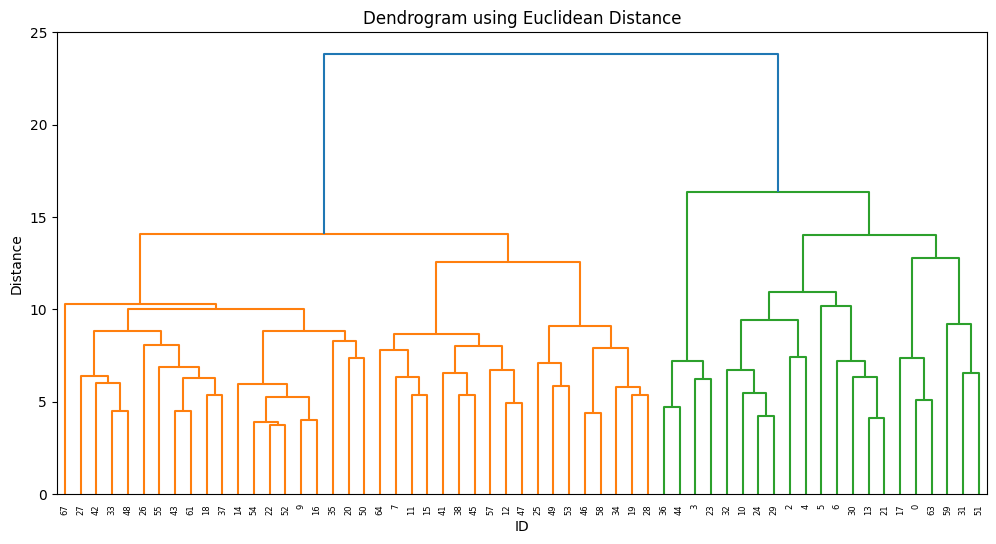

In [7]:
plt.figure(figsize=(12, 6))
plt.title('Dendrogram using Euclidean Distance')
sch.dendrogram(euclidean_clustering, labels=selected_columns.index)
plt.xticks(rotation=90)
plt.xlabel('ID')
plt.ylabel('Distance')
plt.savefig('../figures/04_euclidean_dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()


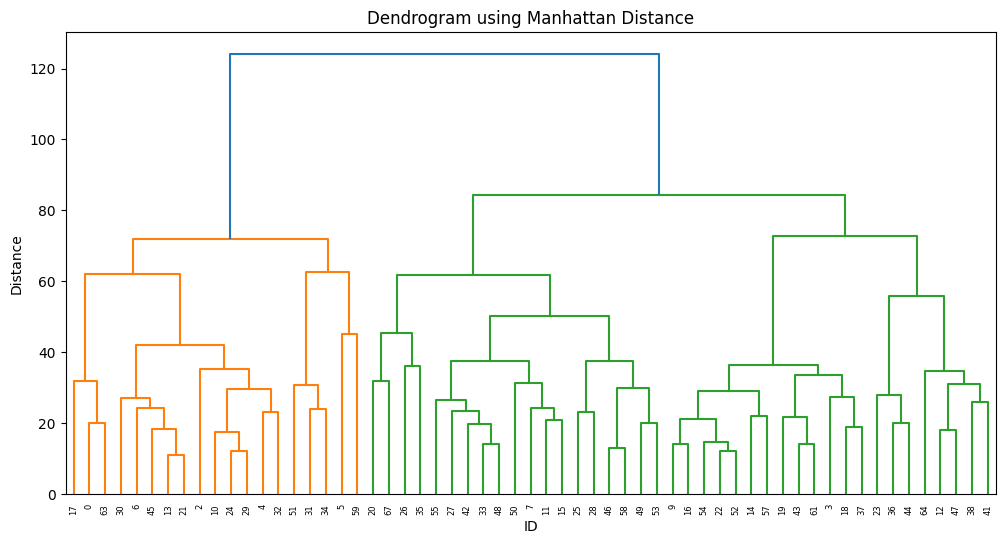

In [8]:
plt.figure(figsize=(12, 6))
plt.title('Dendrogram using Manhattan Distance')
sch.dendrogram(manhattan_clustering, labels=selected_columns.index)
plt.xticks(rotation=90)
plt.xlabel('ID')
plt.ylabel('Distance')
plt.savefig('../figures/04_manhattan_dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
threshold_euclidean = 14  
threshold_manhattan = 50  

euclidean_clusters = fcluster(euclidean_clustering, t=threshold_euclidean, criterion='distance')

manhattan_clusters = fcluster(manhattan_clustering, t=threshold_manhattan, criterion='distance')

data['Euclidean Cluster'] = euclidean_clusters
data['Manhattan Cluster'] = manhattan_clusters

data

,Participation,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)","Front End: (HTML, JavaScript, CSS)",Databases: SQL,Databases: NoSQL,...,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR,Euclidean Cluster,Manhattan Cluster
ID,,,,,,,,,,,,,,,,,,,,,
0,Project+organization,2.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,...,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,5,1
2,Project,3.0,3.0,0.0,3.0,2.0,2.0,0.0,4.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4,2
3,Project,1.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,...,1.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,3,8
4,Project+organization,3.0,3.0,2.0,2.0,2.0,2.0,0.0,3.0,2.0,...,2.0,2.0,3.0,0.0,3.0,0.0,2.0,0.0,4,2
5,Project+organization,3.0,3.0,2.0,2.0,2.0,2.0,0.0,3.0,0.0,...,3.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,4,4
6,Project+organization,0.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,...,2.0,0.0,2.0,0.0,2.0,3.0,2.0,0.0,4,2
7,Project,2.0,3.0,2.0,2.0,2.0,2.0,0.0,3.0,2.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2,6
9,Project,3.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1,8
10,Project,0.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4,2


In [10]:
num_euclidean_clusters = len(np.unique(euclidean_clusters))
num_manhattan_clusters = len(np.unique(manhattan_clusters))

print(f"Liczba klastrów (odległość euklidesowa): {num_euclidean_clusters}")
print(f"Liczba klastrów (odległość Manhattan): {num_manhattan_clusters}")

Liczba klastrów (odległość euklidesowa): 5
Liczba klastrów (odległość Manhattan): 10


In [11]:
euclidean_cluster_assignment = data.groupby('Euclidean Cluster').apply(lambda x: list(x.index)).to_dict()
manhattan_cluster_assignment = data.groupby('Manhattan Cluster').apply(lambda x: list(x.index)).to_dict()

print("\nPrzypisanie obiektów do klastrów (odległość euklidesowa):")
for cluster, members in euclidean_cluster_assignment.items():
    print(f"Klaster {cluster}: {members}")

print("\nPrzypisanie obiektów do klastrów (odległość Manhattan):")
for cluster, members in manhattan_cluster_assignment.items():
    print(f"Klaster {cluster}: {members}")



Przypisanie obiektów do klastrów (odległość euklidesowa):
Klaster 1: [9, 14, 16, 18, 20, 22, 26, 27, 33, 35, 37, 42, 43, 48, 50, 52, 54, 55, 61, 67]
Klaster 2: [7, 11, 12, 15, 19, 25, 28, 34, 38, 41, 45, 46, 47, 49, 53, 57, 58, 64]
Klaster 3: [3, 23, 36, 44]
Klaster 4: [2, 4, 5, 6, 10, 13, 21, 24, 29, 30, 32]
Klaster 5: [0, 17, 31, 51, 59, 63]

Przypisanie obiektów do klastrów (odległość Manhattan):
Klaster 1: [0, 17, 63]
Klaster 2: [2, 4, 6, 10, 13, 21, 24, 29, 30, 32, 45]
Klaster 3: [31, 34, 51]
Klaster 4: [5, 59]
Klaster 5: [20, 26, 35, 67]
Klaster 6: [7, 11, 15, 27, 33, 42, 48, 50, 55]
Klaster 7: [25, 28, 46, 49, 53, 58]
Klaster 8: [3, 9, 14, 16, 18, 19, 22, 37, 43, 52, 54, 57, 61]
Klaster 9: [23, 36, 44]
Klaster 10: [12, 38, 41, 47, 64]


/var/folders/g2/yfkj5x354bg2wg_5t6jzg9_80000gn/T/ipykernel_16058/1956439932.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  euclidean_cluster_assignment = data.groupby('Euclidean Cluster').apply(lambda x: list(x.index)).to_dict()
/var/folders/g2/yfkj5x354bg2wg_5t6jzg9_80000gn/T/ipykernel_16058/1956439932.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  manhattan_cluster_assignment = data.groupby('Man

Data without industry knowledge

In [12]:
euclidean_dist_ik = pdist(selected_columns_knowledge, metric='euclidean')
manhattan_dist_ik = pdist(selected_columns_knowledge, metric='cityblock')


euclidean_clustering_ik = sch.linkage(euclidean_dist_ik, method='ward')
manhattan_clustering_ik = sch.linkage(manhattan_dist_ik, method='ward')

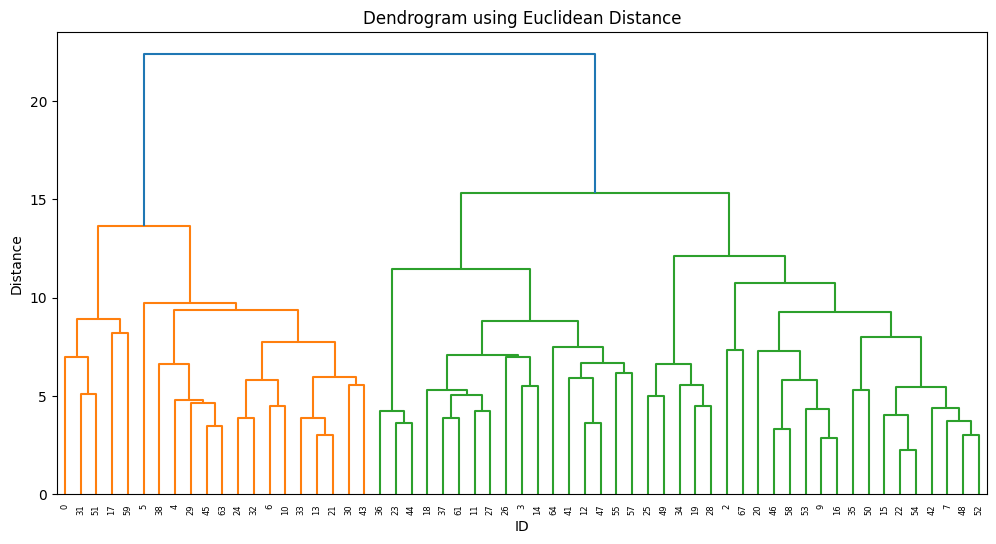

In [13]:
plt.figure(figsize=(12, 6))
plt.title('Dendrogram using Euclidean Distance')
sch.dendrogram(euclidean_clustering_ik, labels=selected_columns_knowledge.index)
plt.xticks(rotation=90)
plt.xlabel('ID')
plt.ylabel('Distance')
plt.show()

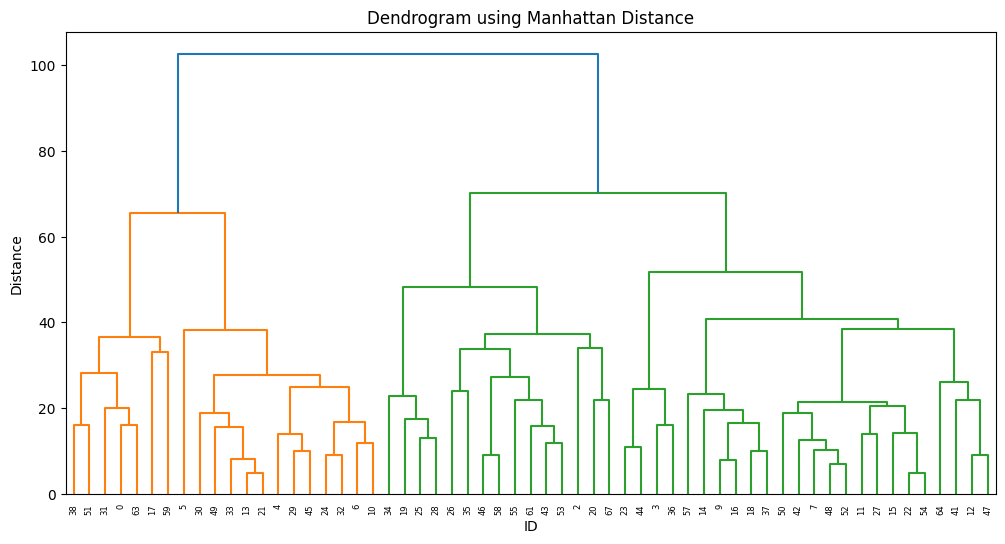

In [14]:
plt.figure(figsize=(12, 6))
plt.title('Dendrogram using Manhattan Distance')
sch.dendrogram(manhattan_clustering_ik, labels=selected_columns_knowledge.index)
plt.xticks(rotation=90)
plt.xlabel('ID')
plt.ylabel('Distance')
plt.show()

In [15]:
threshold_euclidea_ik = 11
threshold_manhattan_ik = 45  

euclidean_clusters_ik = fcluster(euclidean_clustering_ik, t=threshold_euclidea_ik, criterion='distance')

manhattan_clusters_ik = fcluster(manhattan_clustering_ik, t=threshold_manhattan_ik, criterion='distance')

data['Euclidean Cluster'] = euclidean_clusters_ik
data['Manhattan Cluster'] = manhattan_clusters_ik

data

,Participation,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)","Front End: (HTML, JavaScript, CSS)",Databases: SQL,Databases: NoSQL,...,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR,Euclidean Cluster,Manhattan Cluster
ID,,,,,,,,,,,,,,,,,,,,,
0,Project+organization,2.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,...,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,1,1
2,Project,3.0,3.0,0.0,3.0,2.0,2.0,0.0,4.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6,4
3,Project,1.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,...,1.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,4,5
4,Project+organization,3.0,3.0,2.0,2.0,2.0,2.0,0.0,3.0,2.0,...,2.0,2.0,3.0,0.0,3.0,0.0,2.0,0.0,2,2
5,Project+organization,3.0,3.0,2.0,2.0,2.0,2.0,0.0,3.0,0.0,...,3.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2,2
6,Project+organization,0.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,...,2.0,0.0,2.0,0.0,2.0,3.0,2.0,0.0,2,2
7,Project,2.0,3.0,2.0,2.0,2.0,2.0,0.0,3.0,2.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6,6
9,Project,3.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,6,6
10,Project,0.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2


In [16]:
num_euclidean_clusters_ik = len(np.unique(euclidean_clusters_ik))
num_manhattan_clusters_ik = len(np.unique(manhattan_clusters_ik))

print(f"Liczba klastrów (odległość euklidesowa): {num_euclidean_clusters_ik}")
print(f"Liczba klastrów (odległość Manhattan): {num_manhattan_clusters_ik}")

Liczba klastrów (odległość euklidesowa): 6
Liczba klastrów (odległość Manhattan): 6


In [17]:
euclidean_cluster_assignment_ik = data.groupby('Euclidean Cluster').apply(lambda x: list(x.index)).to_dict()
manhattan_cluster_assignment_ik = data.groupby('Manhattan Cluster').apply(lambda x: list(x.index)).to_dict()

print("\nPrzypisanie obiektów do klastrów (odległość euklidesowa):")
for cluster, members in euclidean_cluster_assignment_ik.items():
    print(f"Klaster {cluster}: {members}")

print("\nPrzypisanie obiektów do klastrów (odległość Manhattan):")
for cluster, members in manhattan_cluster_assignment_ik.items():
    print(f"Klaster {cluster}: {members}")


Przypisanie obiektów do klastrów (odległość euklidesowa):
Klaster 1: [0, 17, 31, 51, 59]
Klaster 2: [4, 5, 6, 10, 13, 21, 24, 29, 30, 32, 33, 38, 43, 45, 63]
Klaster 3: [23, 36, 44]
Klaster 4: [3, 11, 12, 14, 18, 26, 27, 37, 41, 47, 55, 57, 61, 64]
Klaster 5: [19, 25, 28, 34, 49]
Klaster 6: [2, 7, 9, 15, 16, 20, 22, 35, 42, 46, 48, 50, 52, 53, 54, 58, 67]

Przypisanie obiektów do klastrów (odległość Manhattan):
Klaster 1: [0, 17, 31, 38, 51, 59, 63]
Klaster 2: [4, 5, 6, 10, 13, 21, 24, 29, 30, 32, 33, 45, 49]
Klaster 3: [19, 25, 28, 34]
Klaster 4: [2, 20, 26, 35, 43, 46, 53, 55, 58, 61, 67]
Klaster 5: [3, 23, 36, 44]
Klaster 6: [7, 9, 11, 12, 14, 15, 16, 18, 22, 27, 37, 41, 42, 47, 48, 50, 52, 54, 57, 64]


/var/folders/g2/yfkj5x354bg2wg_5t6jzg9_80000gn/T/ipykernel_16058/1223854004.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  euclidean_cluster_assignment_ik = data.groupby('Euclidean Cluster').apply(lambda x: list(x.index)).to_dict()
/var/folders/g2/yfkj5x354bg2wg_5t6jzg9_80000gn/T/ipykernel_16058/1223854004.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  manhattan_cluster_assignment_ik = data.groupb